1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Load Data

In [5]:
df = pd.read_csv("Credit_Data.csv")

In [6]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 21)


In [7]:
print("First Rows:\n", df.head())

First Rows:
    default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3        

3. Basic Summary

In [8]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
            default  duration_in_month  credit_amount  \
count  1000.000000        1000.000000    1000.000000   
mean      0.300000          20.903000    3271.258000   
std       0.458487          12.058814    2822.736876   
min       0.000000           4.000000     250.000000   
25%       0.000000          12.000000    1365.500000   
50%       0.000000          18.000000    2319.500000   
75%       1.000000          24.000000    3972.250000   
max       1.000000          72.000000   18424.000000   

       installment_as_income_perc  present_res_since          age  \
count                 1000.000000        1000.000000  1000.000000   
mean                     2.973000           2.845000    35.546000   
std                      1.118715           1.103718    11.375469   
min                      1.000000           1.000000    19.000000   
25%                      2.000000           2.000000    27.000000   
50%                      3.000000           3.000000    33.

In [9]:
print("\nNull Values:\n", df.isnull().sum())


Null Values:
 default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64


In [10]:
print("\nData Types:\n", df.dtypes)


Data Types:
 default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object


4. Value Counts

In [11]:
if 'default' in df.columns:
    print("\nTarget Distribution:\n", df['default'].value_counts(normalize=True) * 100)


Target Distribution:
 default
0    70.0
1    30.0
Name: proportion, dtype: float64


5. Handling Missing Values

In [12]:
df.fillna(df.median(numeric_only=True), inplace=True)

6. Detect Outliers with IQR

In [13]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[feature] < lower) | (data[feature] > upper)]


Example: Check for outliers in 'balance'

In [14]:
if 'balance' in df.columns:
    outliers = detect_outliers_iqr(df, 'balance')
    print(f"Outliers in 'balance': {outliers.shape[0]} rows")

7. Visualizations

Histograms

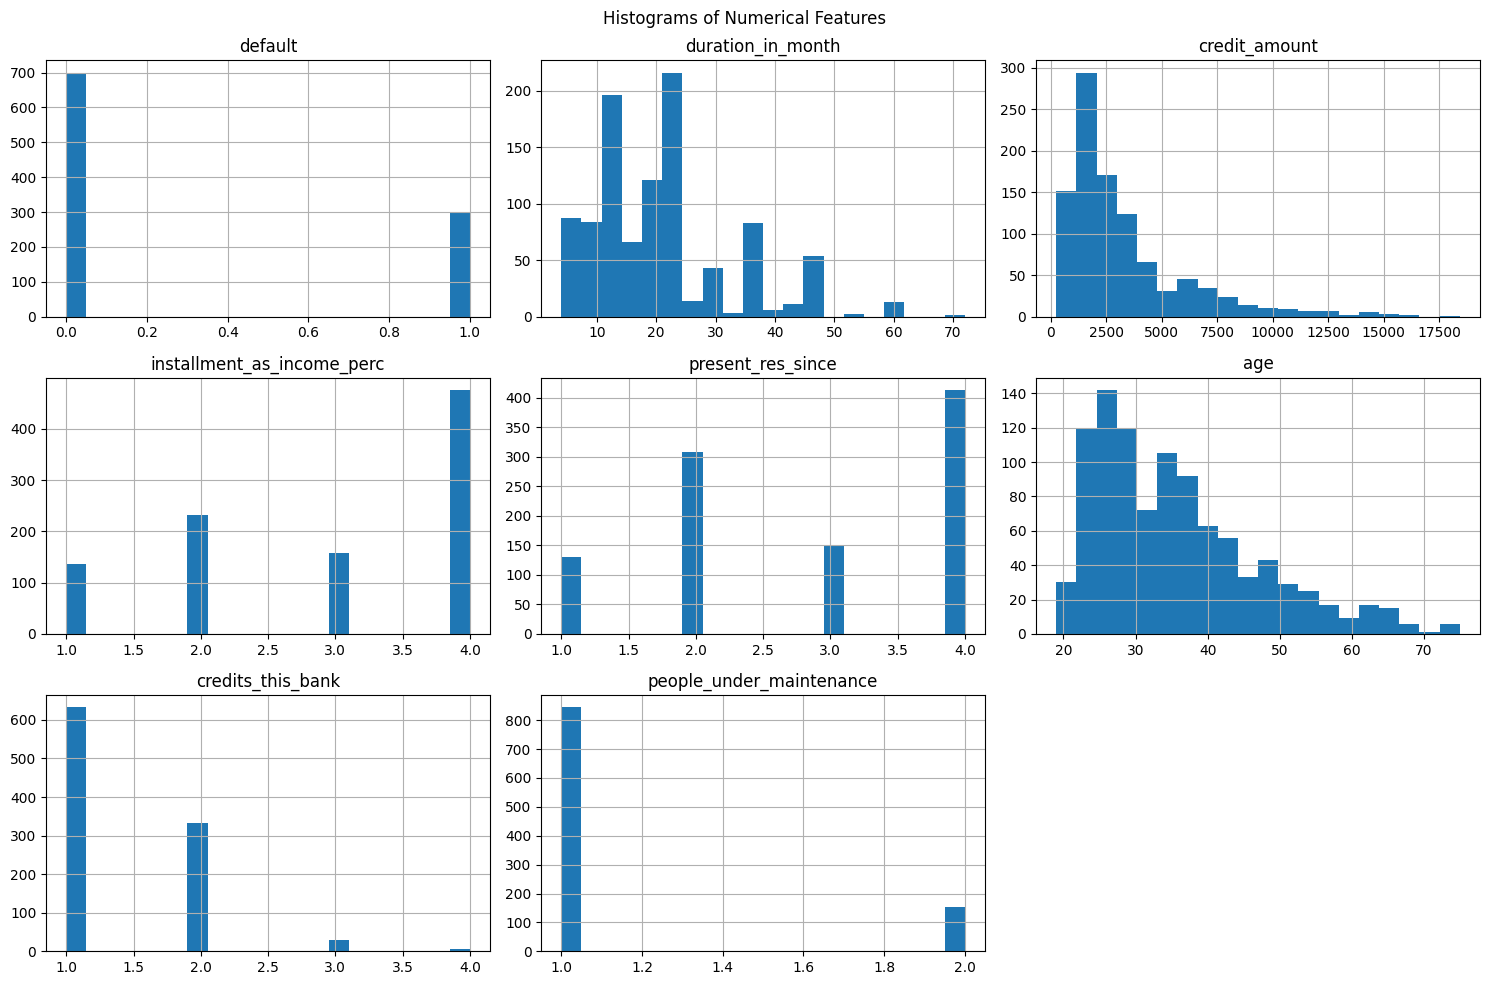

In [15]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

Pairplot (small sample to reduce load)

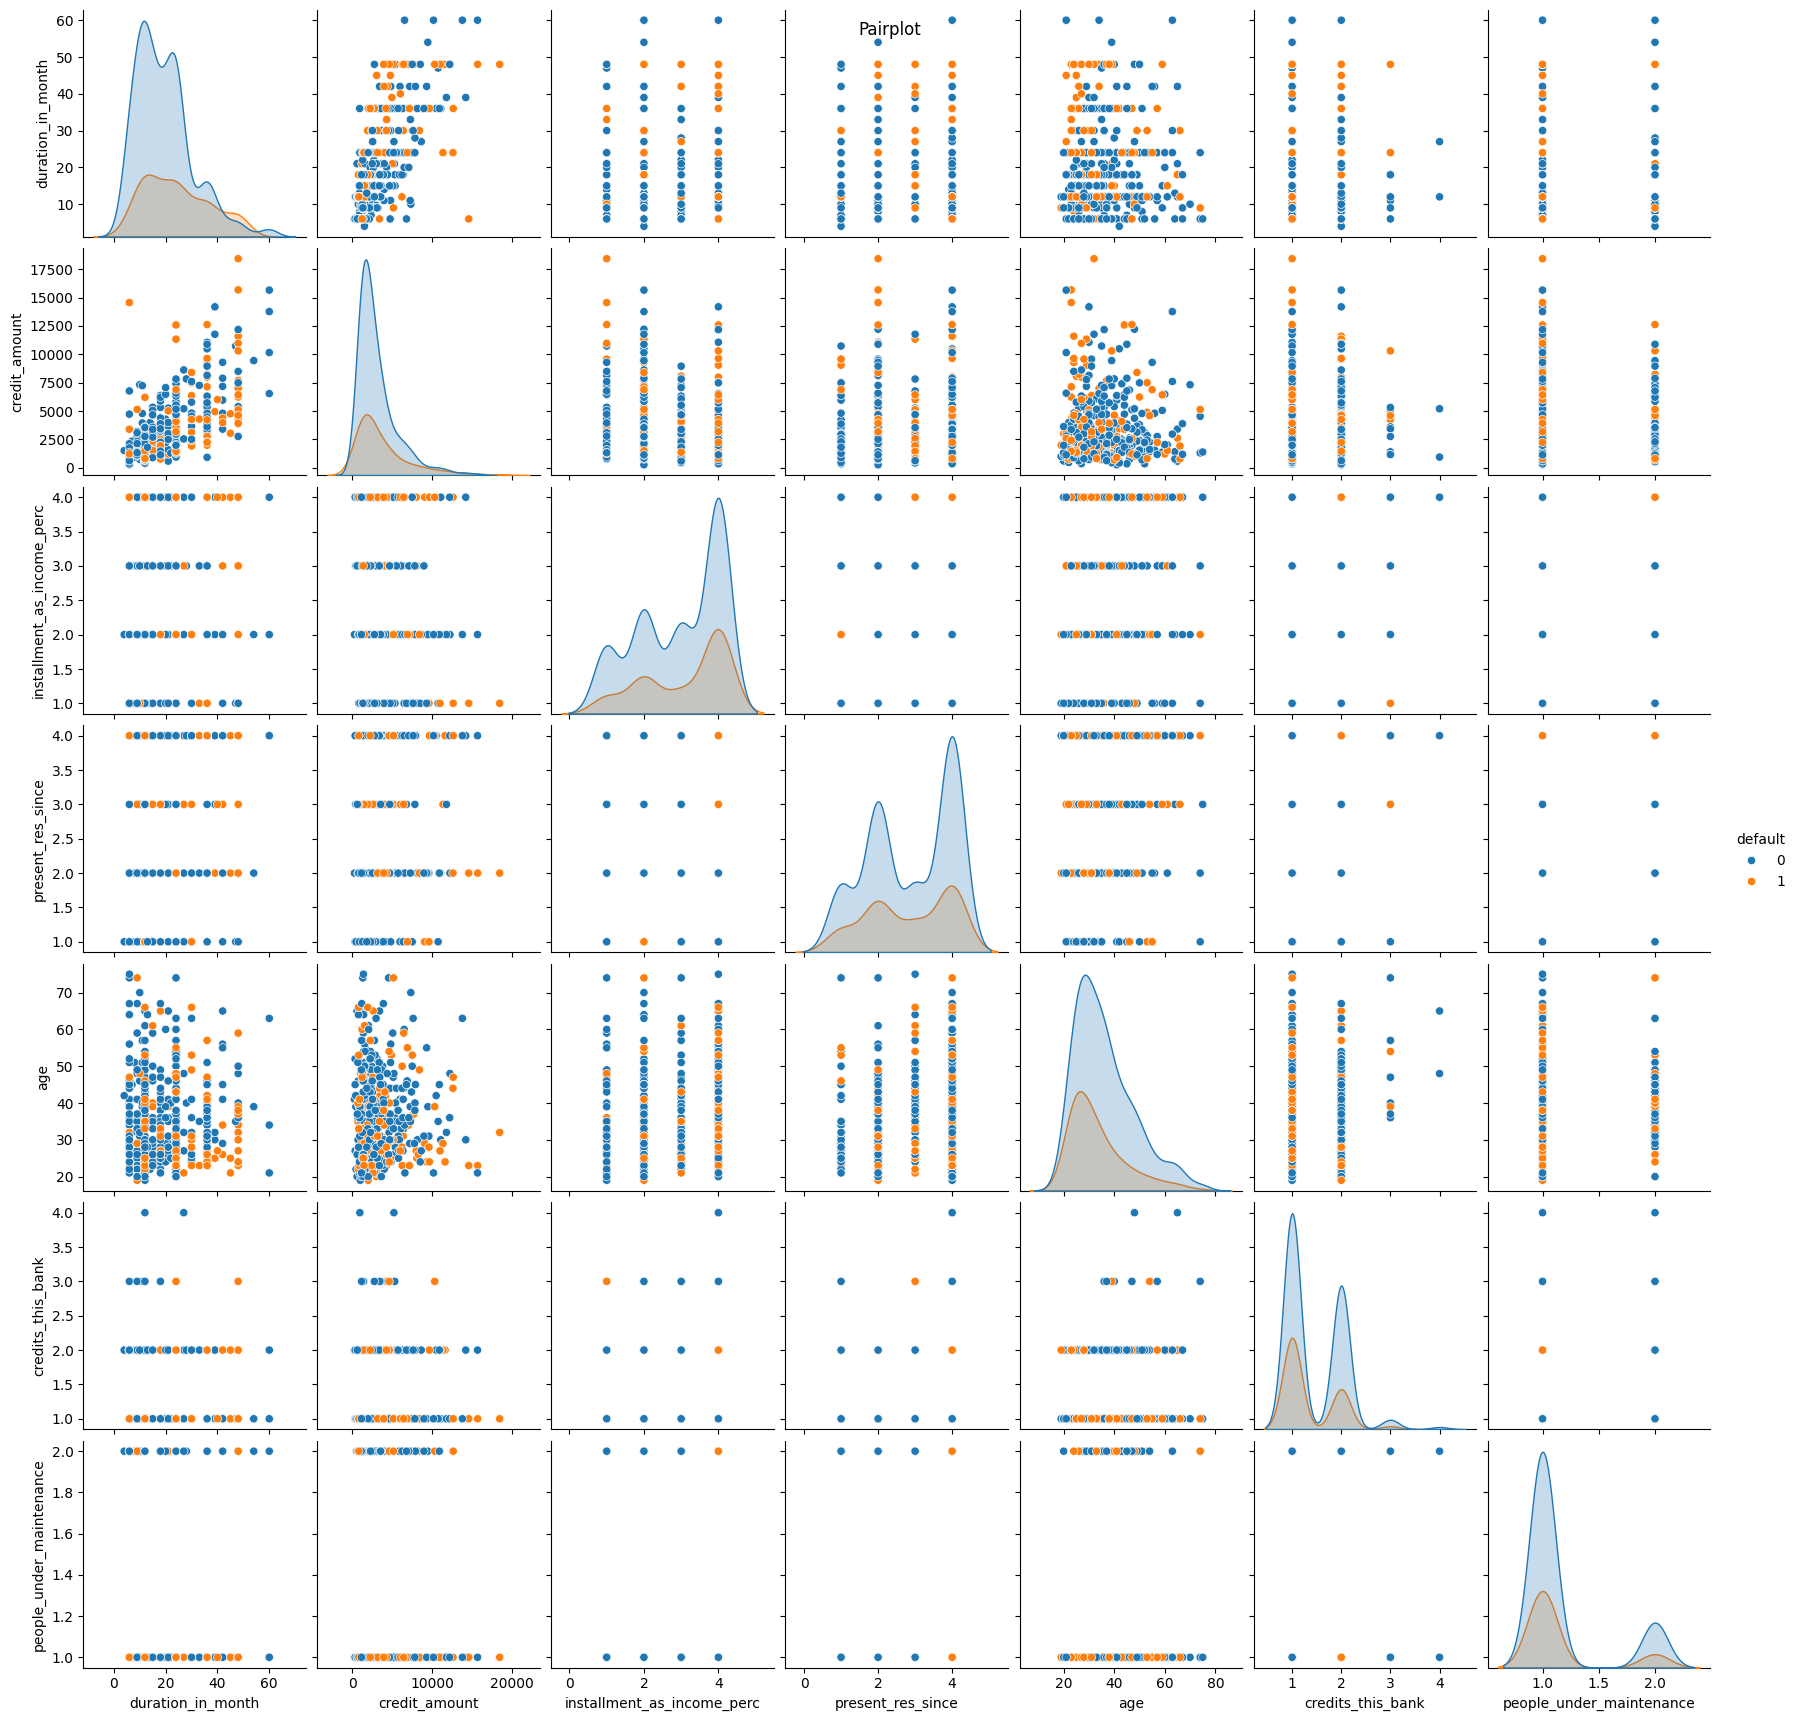

In [16]:
sns.pairplot(df.sample(min(500, len(df))), hue="default" if 'default' in df.columns else None)
plt.suptitle("Pairplot")
plt.show()

8. Encoding Categorical Features

In [18]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


9. Scaling and Splitting

In [19]:
scaler = StandardScaler()
X = df.drop("default", axis=1)
y = df["default"]

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

10. Model Training: Random Forest

In [22]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

11. Model Evaluation

In [23]:
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[130  11]
 [ 32  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       141
           1       0.71      0.46      0.56        59

    accuracy                           0.79       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200

Accuracy Score: 0.785


12. Feature Importance

In [24]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

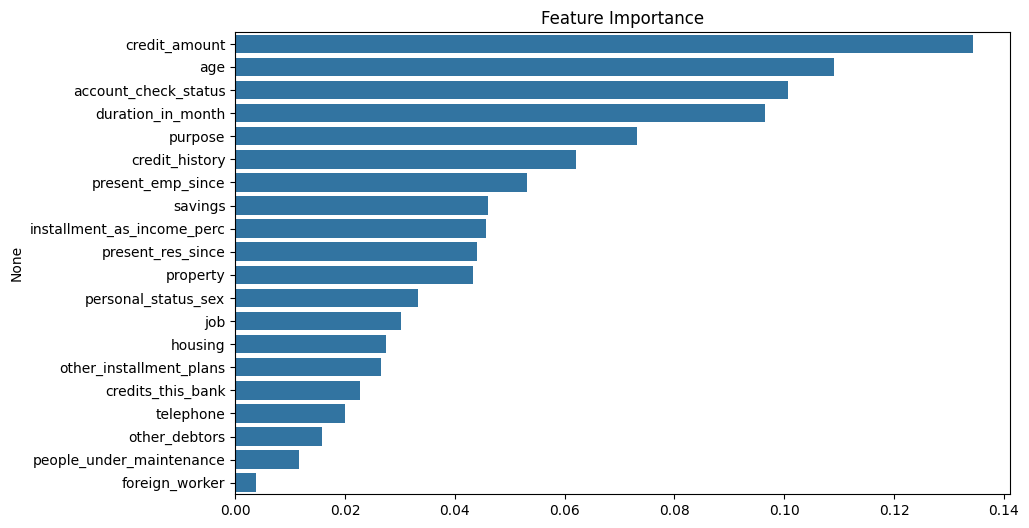

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.show()

13. Hyperparameter Tuning

In [26]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None], 'n_estimators': [50, 100]},
             scoring='accuracy')

In [27]:
print("\nBest Parameters from Grid Search:", grid.best_params_)
print("Best Score from Grid Search:", grid.best_score_)


Best Parameters from Grid Search: {'max_depth': 10, 'n_estimators': 100}
Best Score from Grid Search: 0.74375545605587
